In [68]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import wavfile

import librosa
import librosa.display

44100
(1101824, 2)
(1101824,)


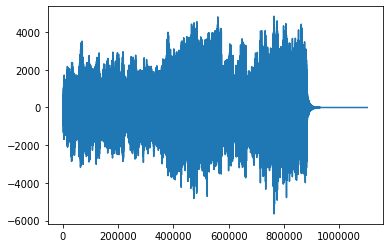

In [62]:
sample_rate, samples = wavfile.read('bee.wav')
print(sample_rate)
print(samples.shape)
if len(samples.shape)>1:
    samples=samples[:, 0]
print(samples.shape)

plt.plot(range(len(samples)), samples)
plt.show()

(129,)
(4918,)
(129, 4918)


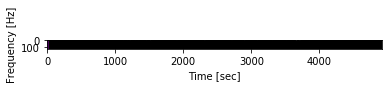

In [63]:
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

print(frequencies.shape)
print(times.shape)
print(spectrogram.shape)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram, cmap='gray')

plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

44100
(2710336,)
(2710336,)


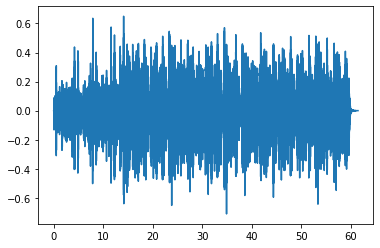

In [90]:
# samples, sample_rate = librosa.load('bee.wav', sr=None, mono=True, offset=0.0, duration=None)
samples, sample_rate = librosa.load(librosa.util.example_audio_file(), sr=None, mono=True, offset=0.0, duration=None)

print(sample_rate)
print(samples.shape)
if len(samples.shape)>1:
    samples=samples[:, 0]
print(samples.shape)

plt.plot(np.arange(len(samples))/sample_rate, samples)
plt.show()

In [121]:
from IPython.display import Audio, display, clear_output
def play_sound(samples, sr, autoplay=True):
    display(Audio(samples, rate=sr, autoplay=autoplay))

In [122]:
samples, sample_rate = librosa.load('bee.wav', sr=None, mono=True, offset=0.0, duration=None)

In [123]:
play_sound(samples,sample_rate)

In [111]:
from IPython.display import Audio
Audio(samples,sample_rate)

OSError: [Errno 9] Bad file descriptor

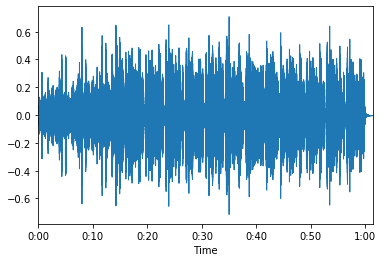

In [91]:
librosa.display.waveplot(y=samples, sr=sample_rate)

In [173]:
y, sr = librosa.load('bee.wav')

In [169]:
sr = 10000
full = np.arange(10000*2)
y = np.sin(0.005*full*np.sqrt(full))

In [174]:
play_sound(y, sr)

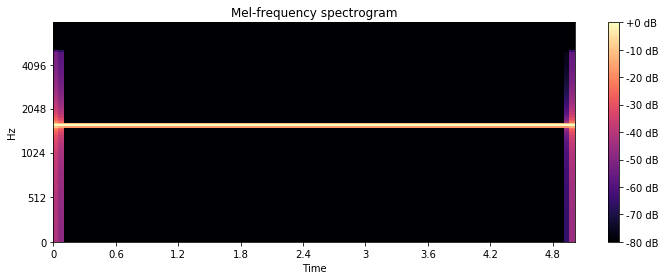

In [141]:
# D = np.abs(librosa.stft(y))**2
# S = librosa.feature.melspectrogram(S=D, sr=sr)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()